In [151]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [152]:
#loading data

retail = pd.read_excel(r'C:\Users\Lisa Sagar\OneDrive\Desktop\Assignmnet\mentor mind final project\Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [154]:
#Understand the Data:
# as per this we have multiple columns has null value in the data set and few columns has 
#category data type and data format issue

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [155]:
retail.isnull().sum()/len(retail)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [156]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [157]:
retail.value_counts('Country')

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [158]:
retail.value_counts('InvoiceNo')

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
557509       1
540264       1
540272       1
557501       1
569420       1
Length: 25900, dtype: int64

In [159]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [160]:
retail.dropna(inplace=True)
retail.reset_index(drop=True, inplace=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [161]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [162]:
# converting all object columns to numeric
retail.StockCode = pd.to_numeric(retail.StockCode, errors='coerce').fillna(0).astype(np.int64)
retail.InvoiceNo = pd.to_numeric(retail.InvoiceNo, errors='coerce').fillna(0).astype(np.int64)
retail.CustomerID = pd.to_numeric(retail.CustomerID, errors='coerce').fillna(0).astype(np.int64)

In [163]:
#Droping unwanted columns
retail_df=retail.drop(columns=['Description','InvoiceDate'])
retail_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,536365,0,6,2.55,17850,United Kingdom
1,536365,71053,6,3.39,17850,United Kingdom
2,536365,0,8,2.75,17850,United Kingdom
3,536365,0,6,3.39,17850,United Kingdom
4,536365,0,6,3.39,17850,United Kingdom


In [164]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   406829 non-null  int64  
 1   StockCode   406829 non-null  int64  
 2   Quantity    406829 non-null  int64  
 3   UnitPrice   406829 non-null  float64
 4   CustomerID  406829 non-null  int64  
 5   Country     406829 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 18.6+ MB


In [165]:
#Clean the Data:
#Encode categorical variables
retail_dummy=pd.get_dummies(retail_df,columns=['Country'],drop_first=True,dtype=int)
retail_dummy.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,0,6,2.55,17850,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,6,3.39,17850,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,0,8,2.75,17850,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,0,6,3.39,17850,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,0,6,3.39,17850,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [166]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [167]:
scalled_data=sc.fit_transform(retail_dummy)
scalled_data=pd.DataFrame(scalled_data,columns=retail_dummy.columns)
scalled_data.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.144265,-1.462388,-0.024373,-0.013135,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
1,-0.144265,2.760349,-0.024373,-0.001017,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
2,-0.144265,-1.462388,-0.016331,-0.010250,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
3,-0.144265,-1.462388,-0.024373,-0.001017,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
4,-0.144265,-1.462388,-0.024373,-0.001017,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497


In [168]:
# finding # of cluser can be using elbow method
from sklearn.cluster import KMeans

In [169]:
error=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(scalled_data)
    error.append(km.inertia_)

In [170]:
import seaborn as sn

<Axes: >

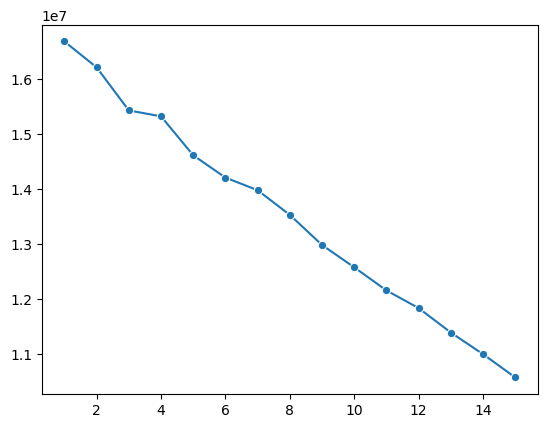

In [171]:
sn.lineplot(x=range(1,16),y=error,marker="o")

In [172]:
#from sklearn.metrics import silhouette_score

In [173]:

#for i in range(2,10):
   # km=KMeans(n_clusters=i)
    #pred=km.fit_predict(scalled_data)
    #score=silhouette_score(scalled_data,pred)
    #print(f"fo the cluster{i},the score is{score}")

In [174]:
#Since data is huge and not running in Local machine , based on Elbow method i can choose 6 cluster 

In [175]:
# Fiting the model to scalled data
KMeans=KMeans(n_clusters=6,init='k-means++')
KMeans.fit(scalled_data)
cluster=KMeans.fit_predict(scalled_data)

In [176]:
#Assigning Cluster Labels to the Original Data
retail['Cluster']=cluster
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [177]:
retail['Cluster'].value_counts()

0    361891
3     33694
2      8491
4      2373
5       229
1       151
Name: Cluster, dtype: int64

In [178]:
retail['Cluster'].describe()

count    406829.000000
mean          0.316723
std           0.914512
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Cluster, dtype: float64

In [179]:
group=retail.groupby('Cluster').mean()
group

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
Cluster,,,,,
0,548996.876944,24833.000533,10.647963,3.148353,15547.913159
1,557964.476821,22419.933775,18.298013,6.030331,17321.079470
2,550897.830173,22014.354022,12.936992,5.049021,12677.995996
3,540118.274945,22996.591737,17.222740,5.730185,13219.682228
4,557189.705436,22630.145386,149.742099,2.737324,14420.282343
5,537547.030568,21701.262009,22.855895,109.645808,12744.000000


In [180]:
group=retail.groupby('Cluster').median()
group

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
Cluster,,,,,
0,561353.0,22500.0,4.0,1.95,15514.0
1,559557.0,22554.0,12.0,1.65,17444.0
2,562450.0,22432.0,10.0,1.79,12674.0
3,560916.0,22491.0,10.0,2.08,12621.0
4,558262.0,22546.0,72.0,1.45,14646.0
5,548968.0,22202.0,12.0,2.10,12744.0


#Secound Approach

In [181]:
# Customer segment analysis
retailone=retail.copy()

In [182]:
retailone.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [183]:
# convert date column to datetime format
retailone['Date']= pd.to_datetime(retailone['InvoiceDate'])
# keep only the most recent date of purchase
retailone['rank'] = retailone.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = retailone[retailone['rank']==1]

In [184]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Date,rank
0,536365,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00,1
2,536365,0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,2010-12-01 08:26:00,1
3,536365,0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00,1
4,536365,0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00,1


In [185]:
#Recency: How recently have they made a purchase?
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

In [186]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,Date,rank,recency
0,536365,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00,1,0
2,536365,0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,2010-12-01 08:26:00,1,0
3,536365,0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00,1,0
4,536365,0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00,1,0


In [187]:
#Frequency: How often have they bought something?
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']
rec_freq = df_freq.merge(df_rec,on='CustomerID')

In [188]:
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cluster,Date,rank,recency
0,12346,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,4,2011-01-18 10:01:00,1,48
1,12347,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,3,2010-12-07 14:57:00,1,6
2,12347,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland,3,2010-12-07 14:57:00,1,6
3,12347,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland,3,2010-12-07 14:57:00,1,6
4,12347,31,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland,3,2010-12-07 14:57:00,1,6


In [214]:
#Monetary Value: How much money do they spend on average when making purchases?
rec_freq['total'] = rec_freq['Quantity']*retailone['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']
rfm = m.merge(rec_freq,on='CustomerID')

In [216]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

In [217]:
finaldf

,CustomerID,recency,frequency,monetary_value
0,12346,48,1,189248.25
1,12347,6,31,1246.73
2,12347,6,31,1246.73
3,12347,6,31,1246.73
4,12347,6,31,1246.73
...,...,...,...,...
100805,18287,172,29,2683.80
100806,18287,172,29,2683.80
100807,18287,172,29,2683.80
100808,18287,172,29,2683.80


In [218]:
scalled_data1=sc.fit_transform(finaldf)
scalled_data1=pd.DataFrame(finaldf,columns=finaldf.columns)
scalled_data.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.144265,-1.462388,-0.024373,-0.013135,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
1,-0.144265,2.760349,-0.024373,-0.001017,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
2,-0.144265,-1.462388,-0.016331,-0.010250,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
3,-0.144265,-1.462388,-0.024373,-0.001017,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497
4,-0.144265,-1.462388,-0.024373,-0.001017,1.49528,-0.031411,-0.006464,-0.071496,-0.008869,-0.019269,...,-0.011941,-0.004958,-0.023732,-0.079153,-0.033718,-0.068082,-0.026754,-0.01293,0.352443,-0.024497


In [219]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(scalled_data1)
    error.append(km.inertia_)

<Axes: >

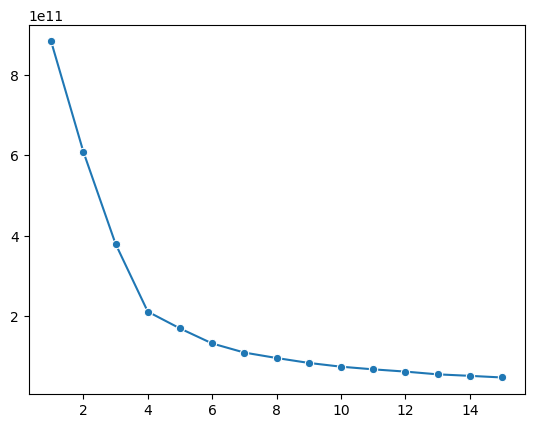

In [220]:
sn.lineplot(x=range(1,16),y=error,marker="o")

In [221]:
#build a model with 6 clusters
KMeans=KMeans(n_clusters=6,init='k-means++')
KMeans.fit(scalled_data1)
cluster=KMeans.fit_predict(scalled_data1)

In [224]:
finaldf['Cluster']=cluster
finaldf.head()

,CustomerID,recency,frequency,monetary_value,Cluster
0,12346,48,1,189248.25,2
1,12347,6,31,1246.73,4
2,12347,6,31,1246.73,4
3,12347,6,31,1246.73,4
4,12347,6,31,1246.73,4


<Axes: xlabel='Cluster', ylabel='recency'>

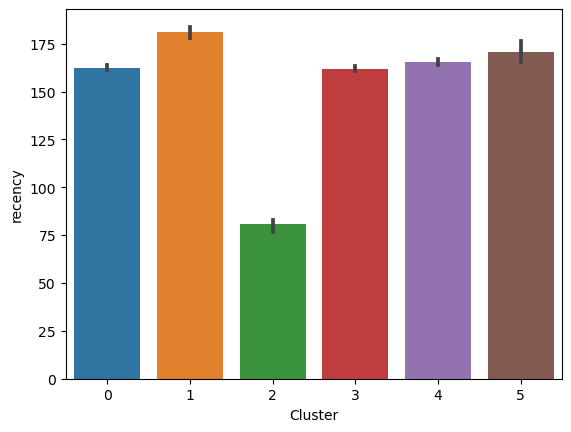

In [228]:
sn.barplot(x=finaldf['Cluster'],y=finaldf['recency'])

<Axes: xlabel='Cluster', ylabel='frequency'>

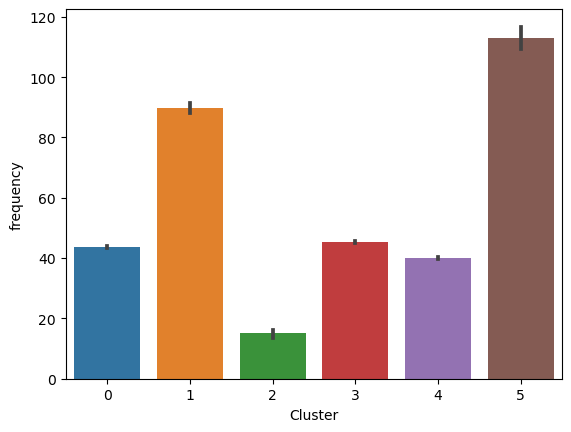

In [229]:
sn.barplot(x=finaldf['Cluster'],y=finaldf['frequency'])

<Axes: xlabel='Cluster', ylabel='monetary_value'>

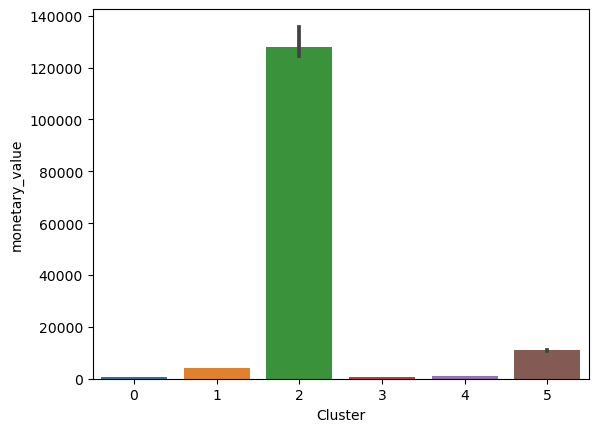

In [230]:
sn.barplot(x=finaldf['Cluster'],y=finaldf['monetary_value'])